<a href="https://colab.research.google.com/github/Arthurads-rj/portfolio-data-science/blob/main/Exemplo%20de%20SVM/ML3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo SVM (Support Vector Machine)
Nesse notebook, fiz uso do SVM para classificar dados de um dataset.
SVM (ou Support Vector Machine)
SVM também são usados para classificação de um dataset, onde o algoritmo traça uma linha de divisão para classificar os dados de acordo com o lado em que os dados se encontram e com a proximidade que os dados tem com a linha de divisão

Neste projeto, irei trabalhar com previsão de câncer mamário, classificando se o câncer é benigno ou maligno de acordo com os dados providenciados pelo dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import sklearn
from sklearn.utils import shuffle
from sklearn import svm
from sklearn import metrics
import seaborn as sns

Irei exibir dados do dataset. Tem alguns pontos que precisam ser esclarecidos:
- O valor na coluna "diagnosis" é binário, sendo 0 para dizer que o cancer é benigno e 1 para maligno
- Os valores das colunas são de tamanhos, sejam eles centímetros(cm) ou milímetros(mm)

In [4]:
cancer = pd.read_csv('../content/drive/MyDrive/Planilhas/Breast_cancer_data.csv')

cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


Depois de observar um pouco os dados, utilizei do algoritmo de SVM para preparar o modelo de predição da máquina.

20% do dataset foi utilizado para treinar a máquina para as previsões.

A taxa de precisão é de 88%~95%

In [10]:
cancer_features = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']
prever = 'diagnosis'

X = np.array(cancer[cancer_features])
y = np.array(cancer[prever])

x_treino, x_teste, y_treino, y_teste  = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

classes = ['benign', 'malignant']

classificador = svm.SVC(kernel='linear')

classificador.fit(x_treino, y_treino)

prev_y = classificador.predict(x_teste) 

prec = metrics.accuracy_score(y_teste, prev_y)

print(f'{prec:.0%}')

for x in range(len(prev_y)):
  print(f'Previsão: {classes[prev_y[x]]}, Dados: {x_teste[x]}, Resultado final: {classes[y_teste[x]]}')
  print()

90%
Previsão: benign, Dados: [1.611e+01 1.805e+01 1.051e+02 8.130e+02 9.721e-02], Resultado final: benign

Previsão: benign, Dados: [2.329e+01 2.667e+01 1.589e+02 1.685e+03 1.141e-01], Resultado final: benign

Previsão: benign, Dados: [2.058e+01 2.214e+01 1.347e+02 1.290e+03 9.090e-02], Resultado final: benign

Previsão: malignant, Dados: [1.385e+01 1.960e+01 8.868e+01 5.926e+02 8.684e-02], Resultado final: malignant

Previsão: malignant, Dados: [1.348e+01 2.082e+01 8.840e+01 5.592e+02 1.016e-01], Resultado final: benign

Previsão: malignant, Dados: [1.334e+01 1.586e+01 8.649e+01 5.200e+02 1.078e-01], Resultado final: malignant

Previsão: benign, Dados: [1.510e+01 2.202e+01 9.726e+01 7.128e+02 9.056e-02], Resultado final: benign

Previsão: malignant, Dados: [1.359e+01 2.184e+01 8.716e+01 5.610e+02 7.956e-02], Resultado final: malignant

Previsão: benign, Dados: [2.742e+01 2.627e+01 1.869e+02 2.501e+03 1.084e-01], Resultado final: benign

Previsão: malignant, Dados: [1.468e+01 2.013e+01

# Gráficos
Os gráficos abaixos são para extrair informações que existem no dataset, como quais são os parâmetros para dizer se o câncer é benigno ou maligno. É possivel tirar algumas conclusões de como é categorizado o câncer em si.

lembrando que 0 = benigno e 1 = maligno.

In [ ]:
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


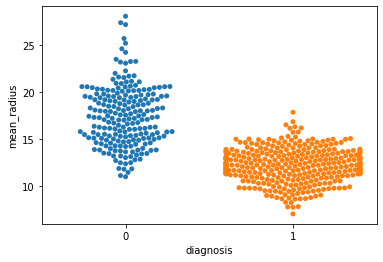

In [ ]:
sns.swarmplot(x=cancer['diagnosis'], y=cancer['mean_radius'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


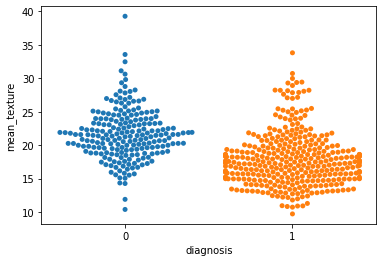

In [ ]:
sns.swarmplot(x=cancer['diagnosis'], y=cancer['mean_texture'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


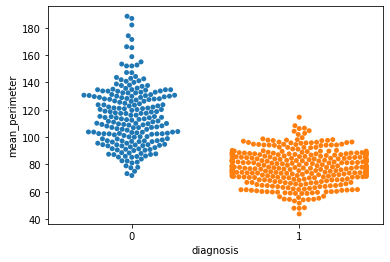

In [ ]:
sns.swarmplot(x=cancer['diagnosis'], y=cancer['mean_perimeter'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


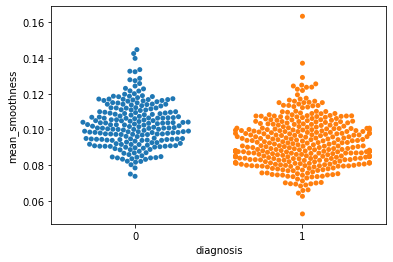

In [ ]:
sns.swarmplot(x=cancer['diagnosis'], y=cancer['mean_smoothness'])

Algumas informações que podem ser extraídas são:
- Maioria dos diagnósticos benignos tem relação com alta média de raio de tamanho, enquanto os malignos são menores.
- Diagnósticos de câncer maligno têm menos textura que os benignos.
- A média de perímetro entre os diagnósticos de câncer maligno são os menores que os benignos
- É dificil de discernir se o câncer é maligno ou benigno baseado apenas se o nódulo é liso ou não. Porém, existe uma pequena tendência ao diagnósticos de câncer maligno serem mais lisos.